\# 问题三
## 所用库的读入

In [1]:
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt

## 照片的读入,数据预处理
+ i1-i6表示读入原图，l1-l6表示转换成的灰度图  
+ 图片名称的数值是由iPhone照片编辑模式调节的曝光数值（iOS13.1）

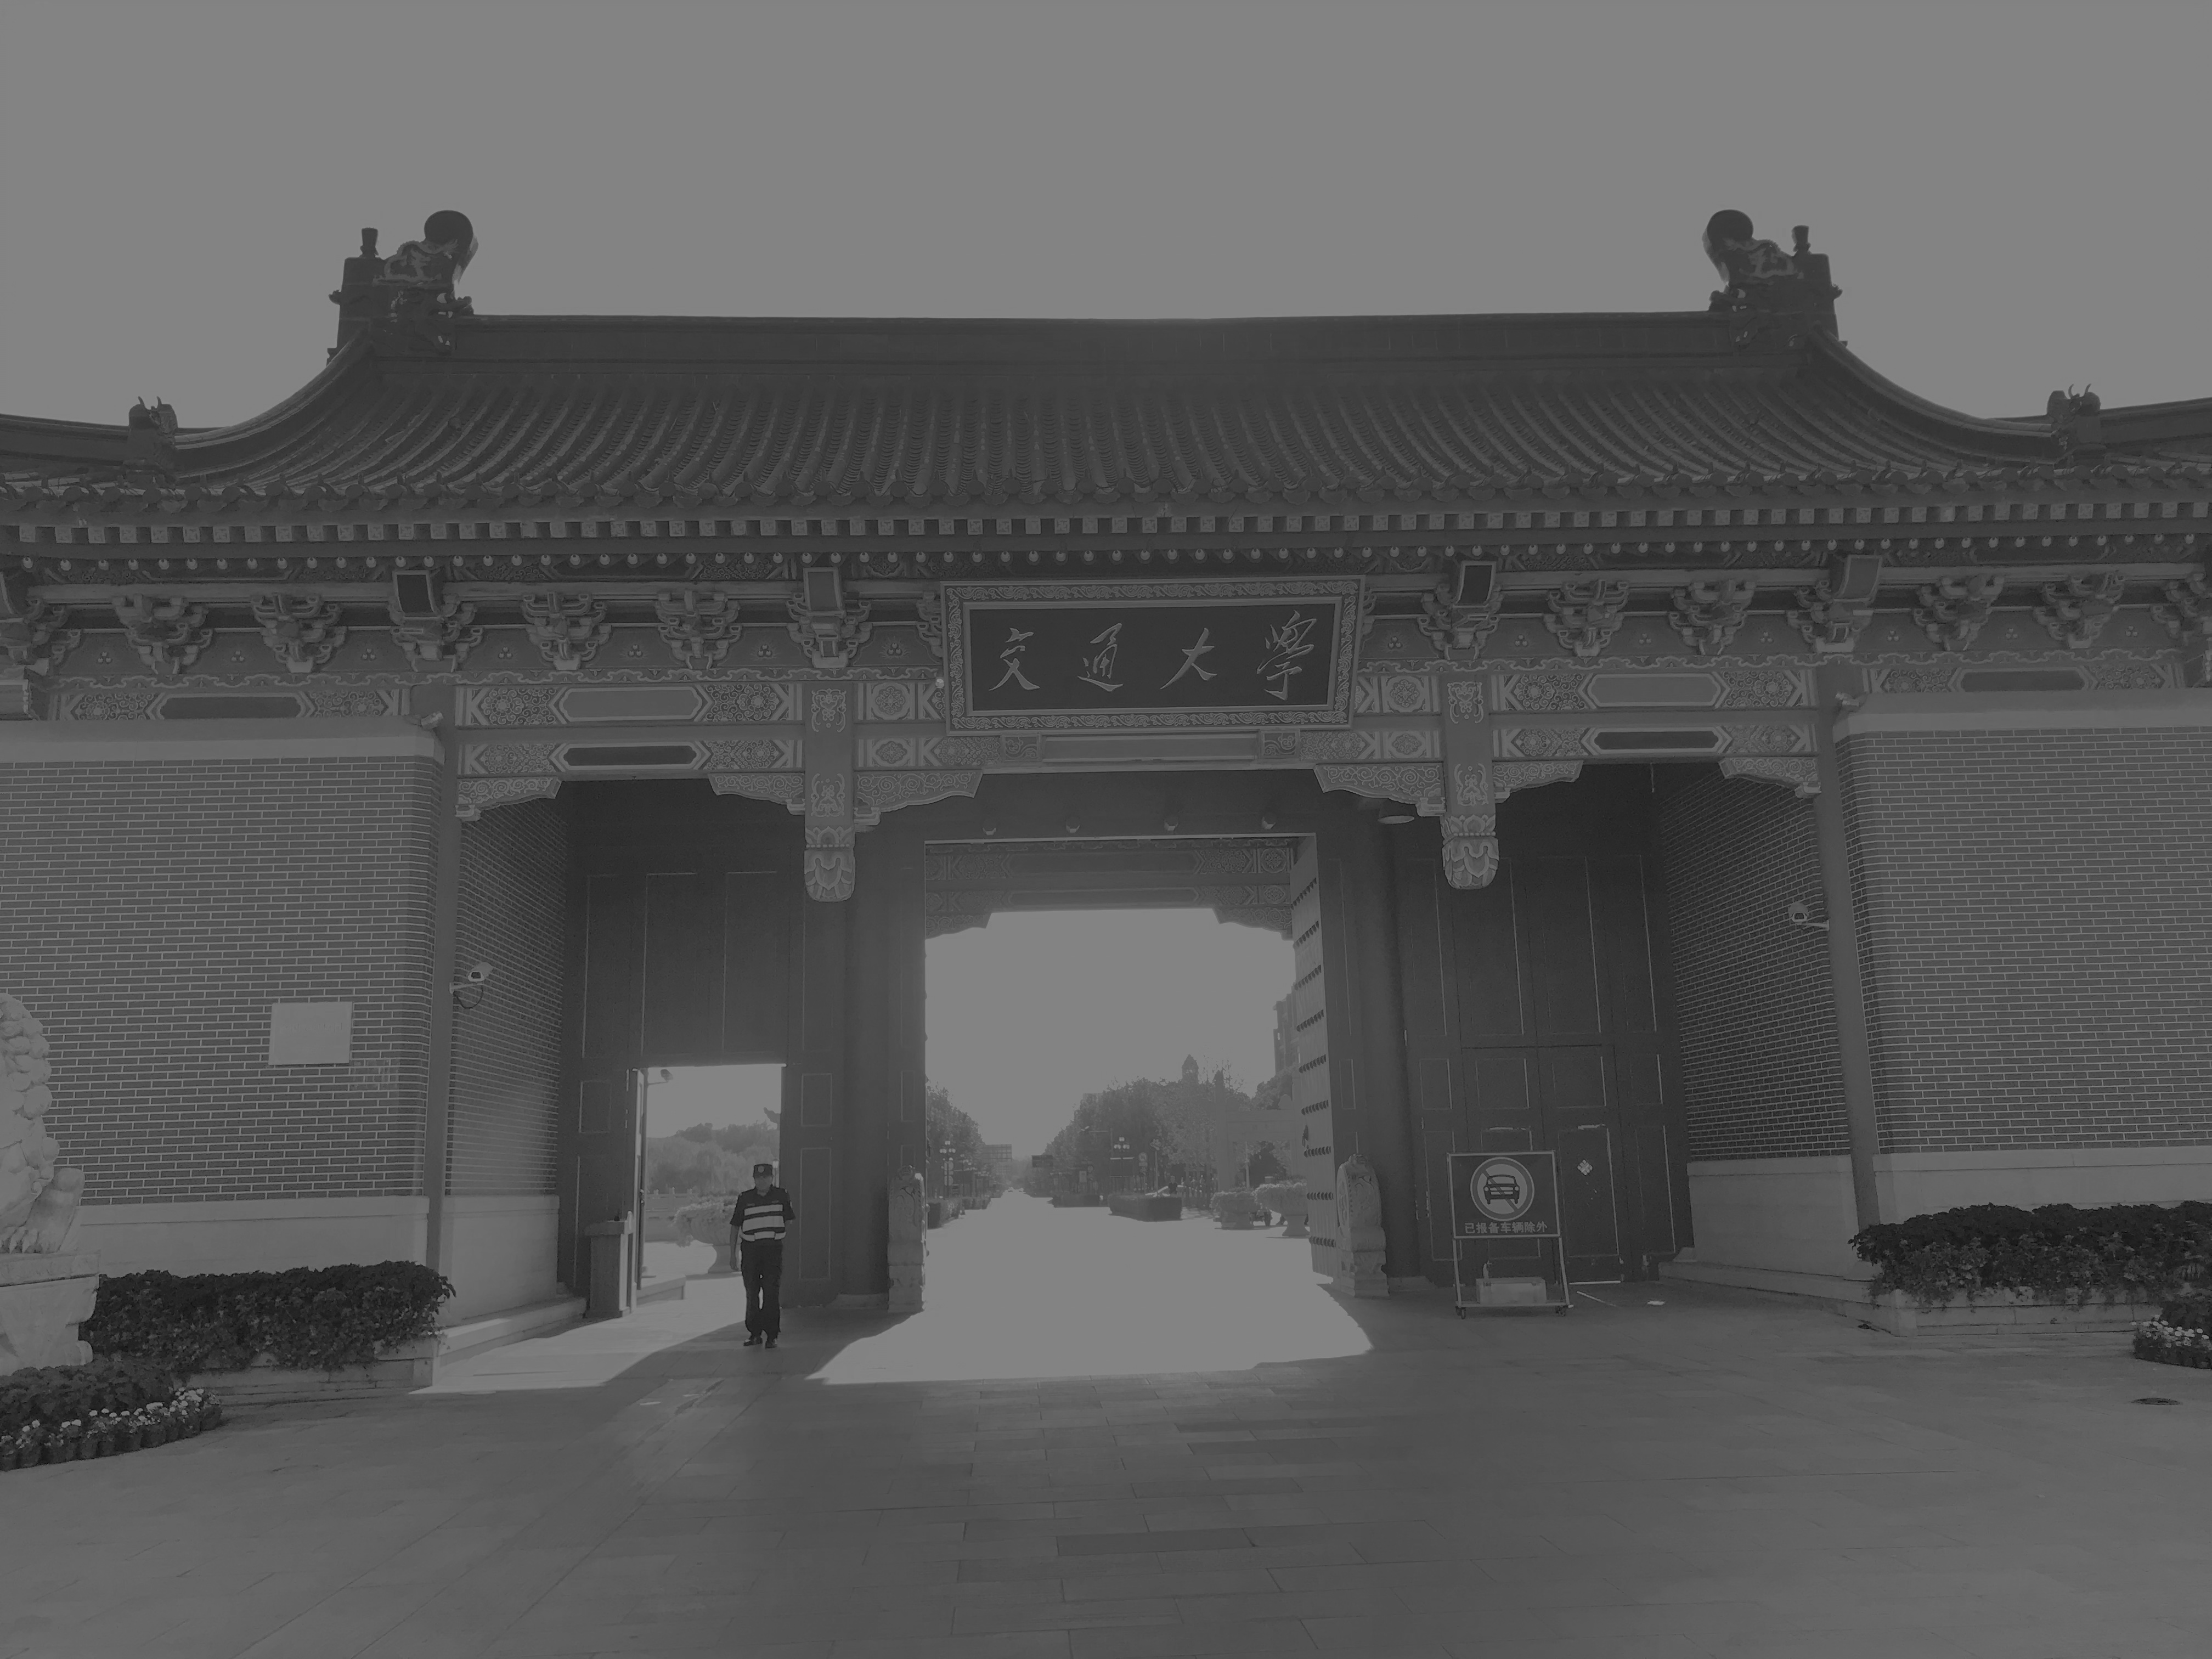

In [2]:
i1 = im.open('-100.png')
i2 = im.open('-65.png')
i3 = im.open('-30.png')
i4 = im.open('0.png')
i5 = im.open('50.png')
i6 = im.open('100.png')
l1 = i1.convert('L')
l2 = i2.convert('L')
l3 = i3.convert('L')
l4 = i4.convert('L')
l5 = i5.convert('L')
l6 = i6.convert('L')
l1

### 图像压缩函数

In [3]:
def compress (img,num):
    a1,a2 = img.size
    img = img.resize((int(a1/num),int(a2/num)))
    return img

In [4]:
l1 = compress(l1,4)
l2 = compress(l2,4)
l3 = compress(l3,4)
l4 = compress(l4,4)
l5 = compress(l5,4)
l6 = compress(l6,4)

### 将图像转为numpy数组类型便于处理

In [5]:
l1_array = np.array(l1)
l2_array = np.array(l2)
l3_array = np.array(l3)
l4_array = np.array(l4)
l5_array = np.array(l5)
l6_array = np.array(l6)
print(l1_array.shape)

(756, 1008)


## 统计函数

In [6]:
def statistics(array):
    x,y = array.shape
    result = np.zeros(256)
    for i in range(0,x-1):
        for j in range (0,y-1):
            result[array[i-1][j-1]] += 1
    result = result/result.sum()
    return result

## 运行统计函数获得灰度值分布

In [7]:
result = np.zeros((6,256))
result[0] = statistics(l1_array)
result[1] = statistics(l2_array)
result[2] = statistics(l3_array)
result[3] = statistics(l4_array)
result[4] = statistics(l5_array)
result[5] = statistics(l6_array)
#print(result[0].max())
#print(result[0].argmax())
#print(result[0])

In [8]:
#print(result[0].max())
#print(result[0].argmax())
#print(result[0])

### 直方图可视化
+ 在第一张图中我们放入曝光度从-100到65的图片
+ 由于曝光度最高时灰度值集中在最高区域，因此将其单列

<function matplotlib.pyplot.show(*args, **kw)>

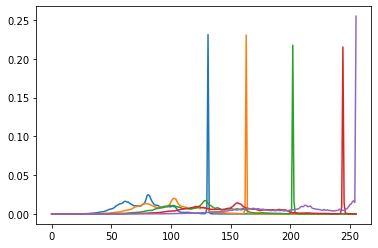

In [9]:
plt.plot(result[0])
plt.show
plt.plot(result[1])
plt.show
plt.plot(result[2])
plt.show
plt.plot(result[3])
plt.show
plt.plot(result[4])
plt.show
#plt.plot(result[5])
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

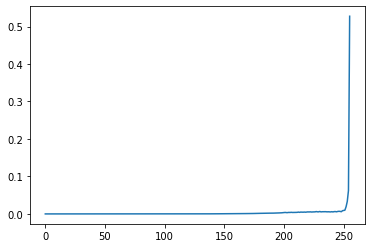

In [10]:
plt.plot(result[5])
plt.show

## CDF函数

In [11]:
def cdf (array):
    a,b = array.shape
    sum_array = np.zeros((a,b))
    for num in range(0,b-1):
        if num == 0:
            sum_array[:,0] = array[:,0]
        else:
            sum_array[:,num] = array[:,num] + sum_array[:,num-1]
    return sum_array 

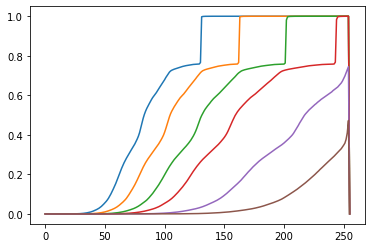

In [12]:
CDF = cdf(result)
plt.plot(CDF[0])
plt.plot(CDF[1])
plt.plot(CDF[2])
plt.plot(CDF[3])
plt.plot(CDF[4])
plt.plot(CDF[5])
plt.show()

## 均一化映射过程

In [13]:
def map_eq(im_array,cdf_array):
    map_eq = np.zeros(256)
    for i in range(256):
        map_eq[i] = int(cdf_array[i]*255)
    [x,y] = im_array.shape
    #print(map_eq)
    #print(x,y)
    im_array_equ = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            #print(im_array[i][j])
            im_array_equ[i][j] = map_eq[im_array[i][j]]
    #print(im_array)
    return im_array_equ

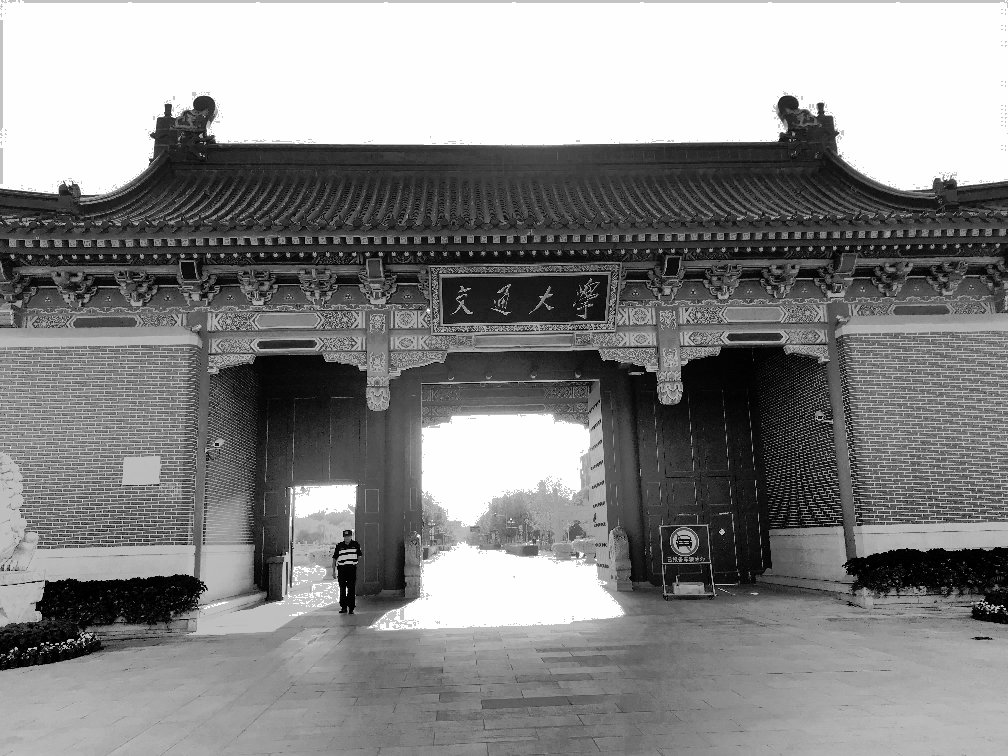

In [14]:
l1_array_map = map_eq(l1_array,CDF[0])
l2_array_map = map_eq(l2_array,CDF[1])
l3_array_map = map_eq(l3_array,CDF[2])
l4_array_map = map_eq(l4_array,CDF[3])
l5_array_map = map_eq(l5_array,CDF[4])
l6_array_map = map_eq(l6_array,CDF[5])
l1_map = np.uint8(l1_array_map)
im_l1_map = im.fromarray(l1_map)
l2_map = np.uint8(l2_array_map)
im_l2_map = im.fromarray(l2_map)
l3_map = np.uint8(l3_array_map)
im_l3_map = im.fromarray(l3_map)
l4_map = np.uint8(l4_array_map)
im_l4_map = im.fromarray(l4_map)
l5_map = np.uint8(l5_array_map)
im_l5_map = im.fromarray(l5_map)
l6_map = np.uint8(l6_array_map)
im_l6_map = im.fromarray(l6_map)
im_l1_map

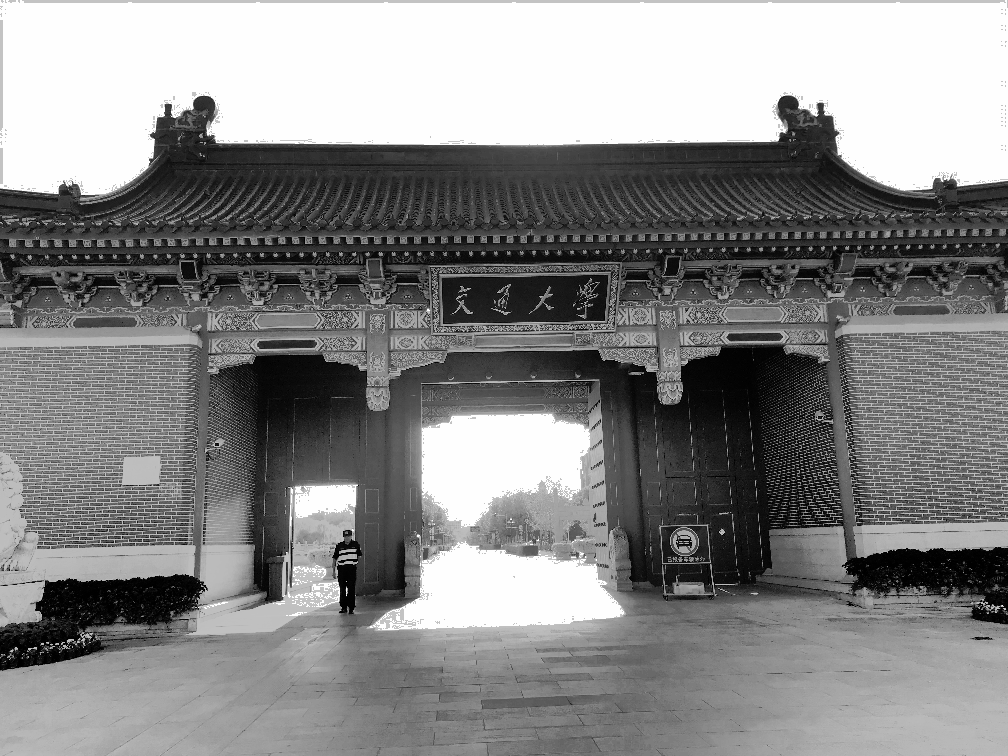

In [15]:
im_l2_map

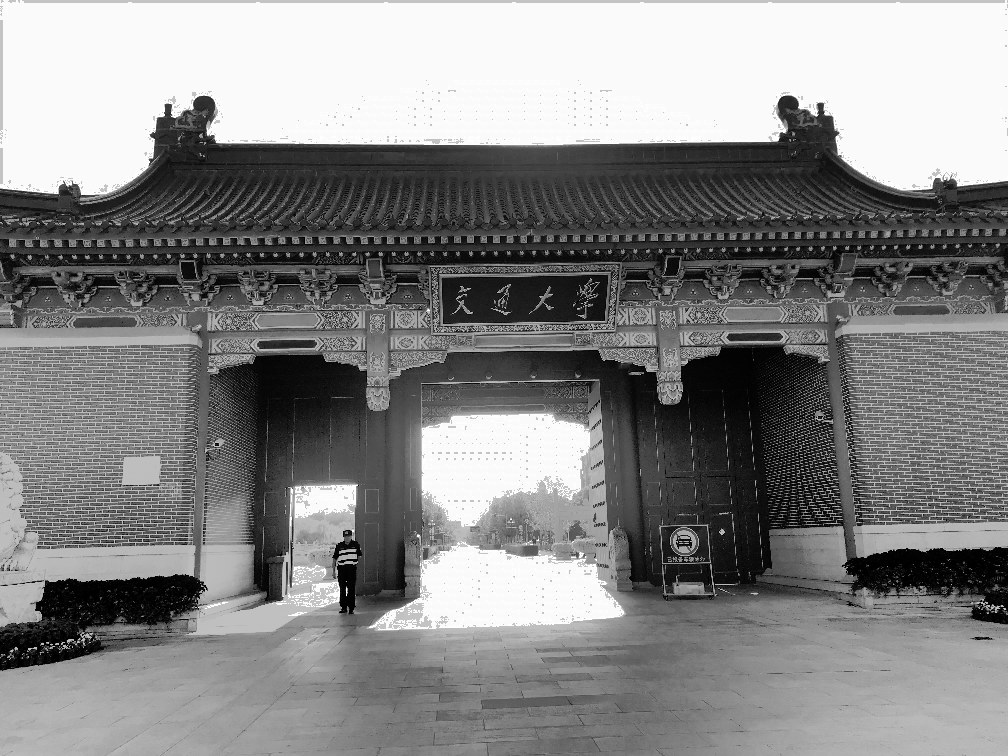

In [16]:
im_l4_map

## 特例化过程

### CDF匹配 
+ 将图片分为三组 1，4 / 2，5 / 3，6
+ 特例化映射函数

In [17]:
def map_sp(cdf1,cdf2):
    x = cdf1.shape[0]
    #print(x)
    map_array = 255 * np.ones(x)
    for i in range(0,x):
          for j in range(0,x):
            if cdf2[j] >= cdf1[i]:
                map_array[i] = j
                break;
    #print(map_array)
    return map_array

In [18]:
def map_special(array,map_sp):
    x_sp,y_sp = array.shape
    l_mapsp = np.zeros((x_sp,y_sp))
    for i in range(0,x_sp):
        for j in range(0,y_sp):
            l_mapsp[i,j] = map_sp[array[i,j]]
    return l_mapsp

### 图四向图一转换（高曝光向低曝光）

图四向图一坐直方图特例化后的显示效果


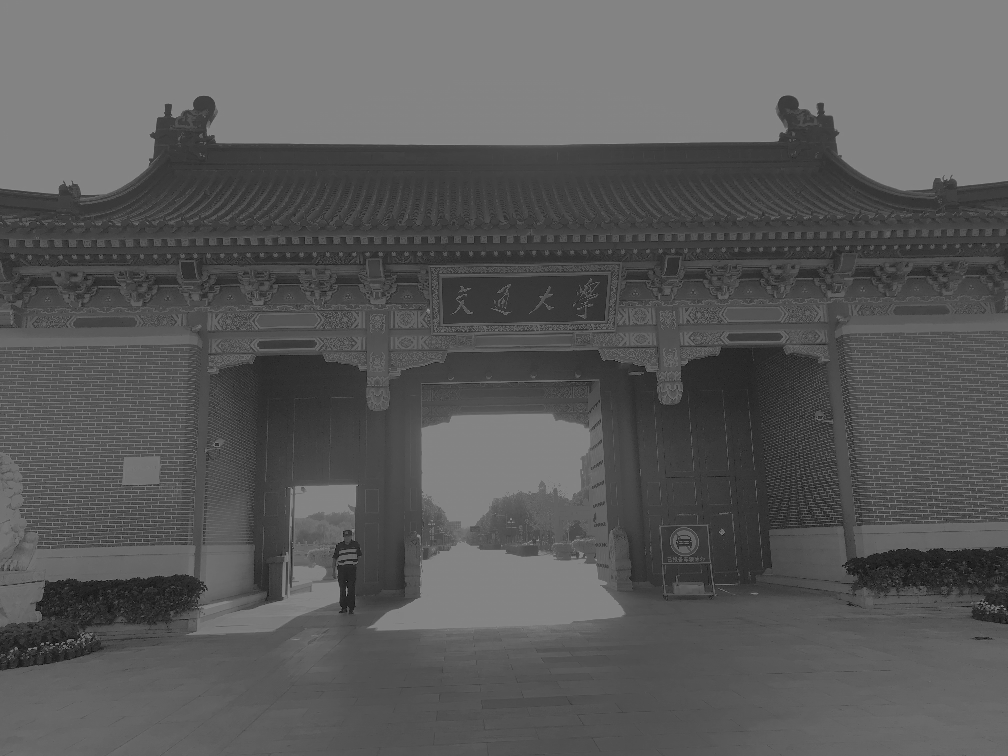

In [19]:
map_sp41 = map_sp(CDF[3],CDF[0])
l1_mapsp_4 = map_special(l4_array,map_sp41)
#print(map_sp14)
#print(l1_mapsp_4)
#print(l6_array)
l1_mapsp_4 = im.fromarray(np.uint8(l1_mapsp_4))
print('图四向图一坐直方图特例化后的显示效果')
l1_mapsp_4

原图一灰度图显示效果


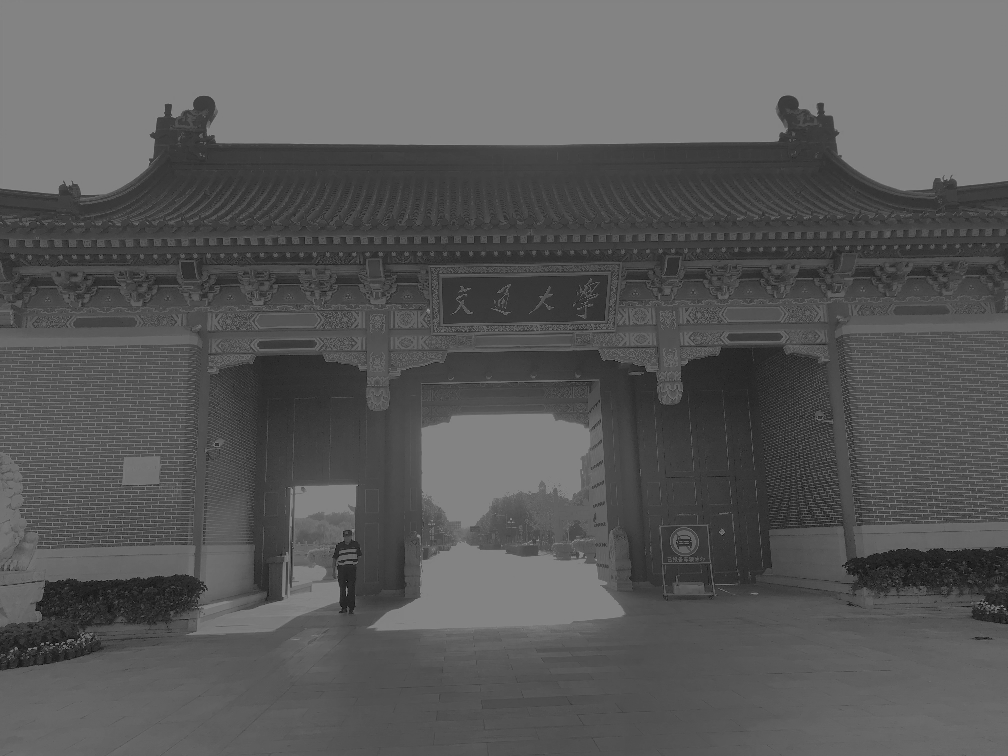

In [20]:
print('原图一灰度图显示效果')
l1

### 下面进行2->5 图片直方图特例化后的展示（低曝光向高曝光）

图二向图五坐直方图特例化后的显示效果


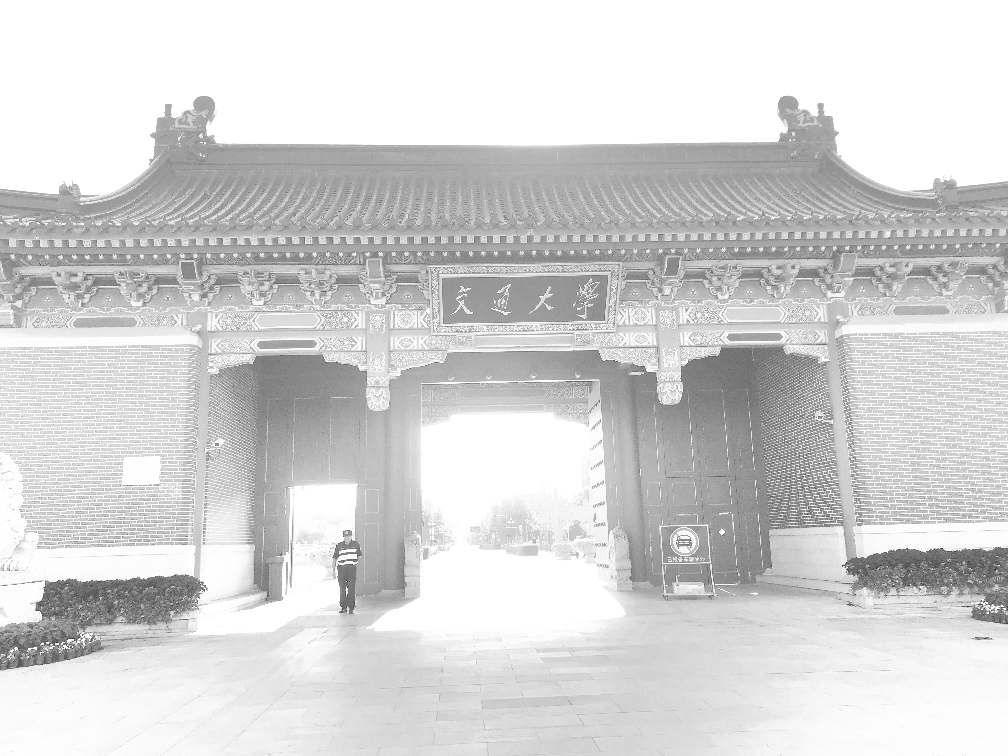

In [21]:
map_sp25 = map_sp(CDF[1],CDF[4])
#print(map_sp25)
l2_mapsp_5 = map_special(l2_array,map_sp25)
#print(l1_mapsp_4)
l2_mapsp_5 = im.fromarray(np.uint8(l2_mapsp_5))
print('图二向图五坐直方图特例化后的显示效果')
l2_mapsp_5

原图五灰度图显示效果


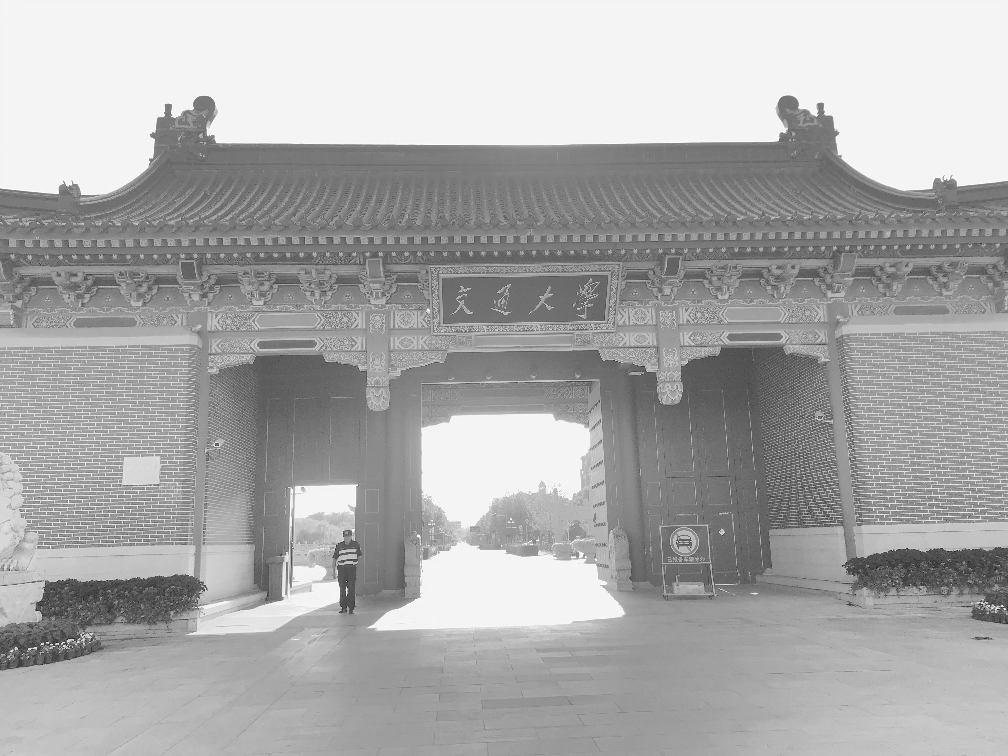

In [22]:
print('原图五灰度图显示效果')
l4

### 下面进行图三向图六转化特例化过程（极限曝光情况）

图三向图六坐直方图特例化后的显示效果


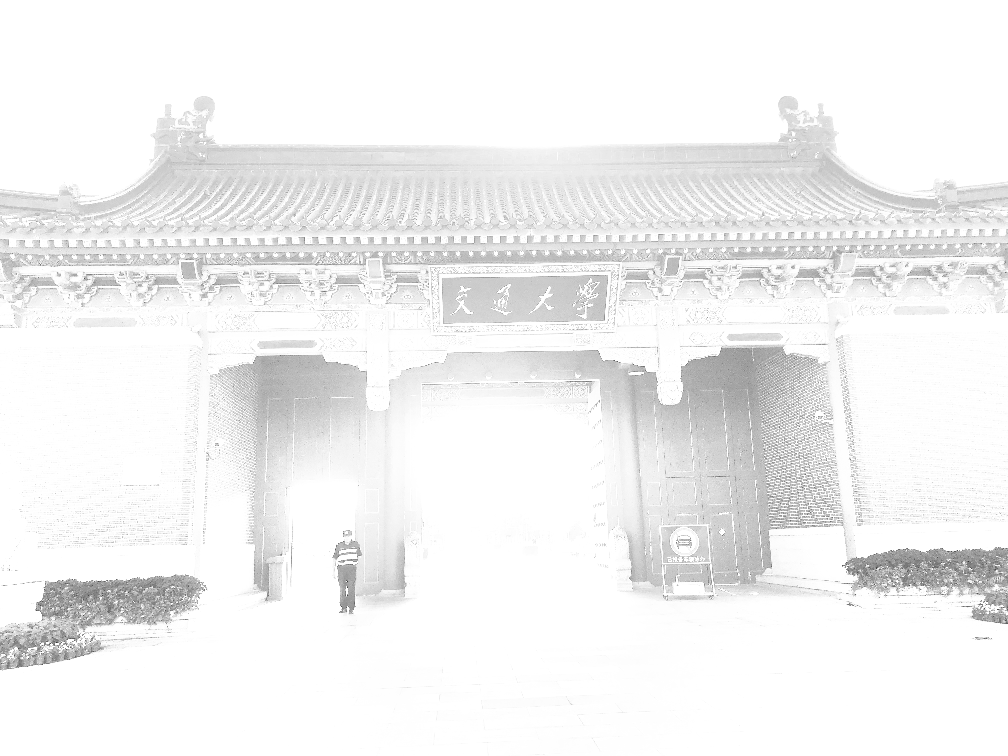

In [23]:
map_sp36 = map_sp(CDF[2],CDF[5])
l3_mapsp_6 = map_special(l3_array,map_sp36)
l3_mapsp_6 = im.fromarray(np.uint8(l3_mapsp_6))
print('图三向图六坐直方图特例化后的显示效果')
l3_mapsp_6

原图六灰度图显示效果


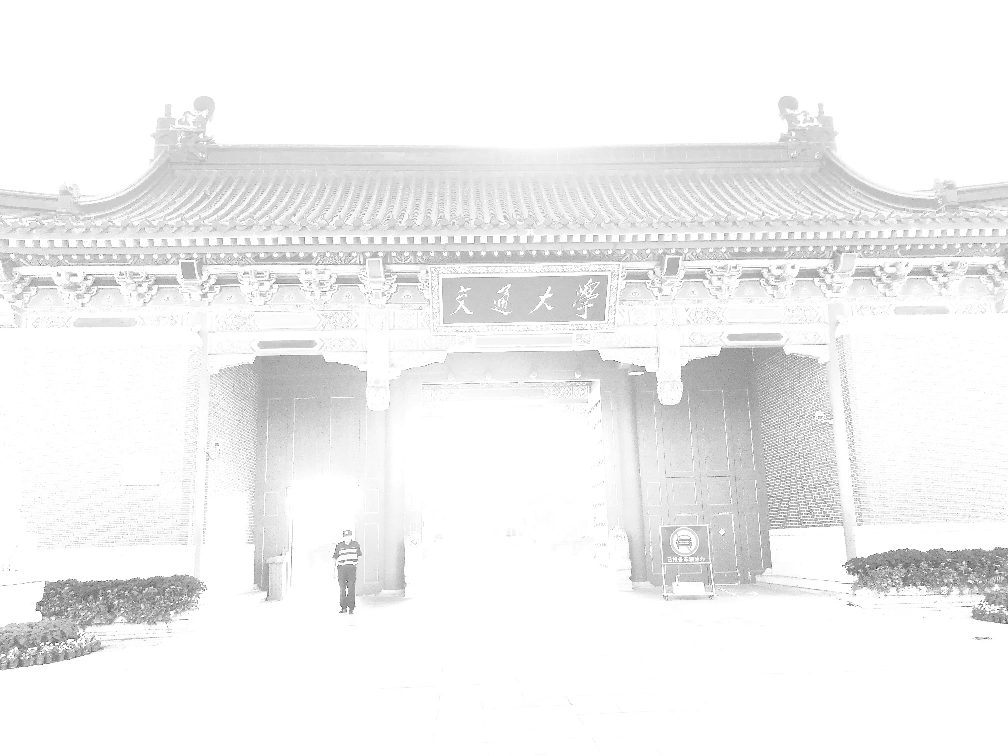

In [24]:
print('原图六灰度图显示效果')
l6